## 5.2 4D-Data: Wind at different pressure levels

We will now deal with a new kind of dataset: 4D-Data. Let's open such a dataset and see what it looks like:

In [44]:
ds = xr.open_dataset('./data/ERA5_LowRes_MonthlyAvg_4D_zuvw_Fabien.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 241, level: 16, longitude: 480, month: 12)
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 10 50 100 200 300 400 ... 750 800 850 900 950 1000
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    z          (month, level, latitude, longitude) float32 ...
    u          (month, level, latitude, longitude) float32 ...
    v          (month, level, latitude, longitude) float32 ...
    w          (month, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-24 21:05:33 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

We have a new coordinate axis: level! Those are the different pressure levels, at which wind data (u,v,w) and height data (z) is available.

In [45]:
ds.level

<xarray.DataArray 'level' (level: 16)>
array([  10,   50,  100,  200,  300,  400,  500,  600,  650,  700,  750,  800,
        850,  900,  950, 1000])
Coordinates:
  * level    (level) int32 10 50 100 200 300 400 ... 750 800 850 900 950 1000
Attributes:
    units:      millibars
    long_name:  pressure_level

The data is available at the pressure levels 50, 100, 200, 300, 400, 500, 700, 850 and 1000 millibars. Millibars are equivalent to hectopascal. 

We can use this new data, to plot the height- (= pressure-) dependency of the horizontal as well as the vertical windfields! Before we do this, let's have a quick look at our variables: u, v, w, and z.

In [46]:
ds.u

<xarray.DataArray 'u' (month: 12, level: 16, latitude: 241, longitude: 480)>
[22210560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 10 50 100 200 300 400 ... 750 800 850 900 950 1000
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [47]:
ds.z # this is the geopotential! get the geopotential height by dividing by g

<xarray.DataArray 'z' (month: 12, level: 16, latitude: 241, longitude: 480)>
[22210560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 10 50 100 200 300 400 ... 750 800 850 900 950 1000
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

We notice furthermore, that the time coordinate changed to a **month coordinate**! The data is already grouped by months and averaged.

### 5.2.1 Vertical Veloctiy

In [48]:
ds.w

<xarray.DataArray 'w' (month: 12, level: 16, latitude: 241, longitude: 480)>
[22210560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 10 50 100 200 300 400 ... 750 800 850 900 950 1000
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:          Pa s**-1
    long_name:      Vertical velocity
    standard_name:  lagrangian_tendency_of_air_pressure

Let's select southamerica @500 hPa, average over time and plot the vertical veloctiy w:

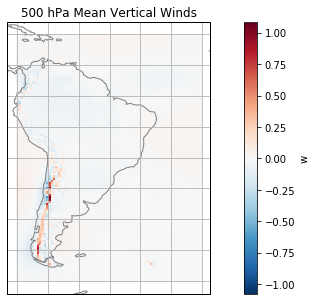

In [50]:
ax = plt.axes(projection=ccrs.PlateCarree())
w = ds.w.mean(dim='month').sel(level=500, longitude = slice(-80,-20), latitude = slice(20,-60))
w.plot(transform = ccrs.PlateCarree() )
ax.set_title('500 hPa Mean Vertical Winds')
ax.coastlines(color='grey'); ax.gridlines();

Sinking air at the upstream side of the andes and rising air at the downstream side? This does not seem very reasonable. We need to change the sign of w!


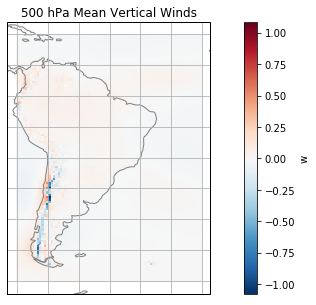

In [51]:
ax = plt.axes(projection=ccrs.PlateCarree())
w = ds.w.mean(dim='month').sel(level=500, longitude = slice(-80,-20), latitude = slice(20,-60))*-1
w.plot(transform = ccrs.PlateCarree() )
ax.set_title('500 hPa Mean Vertical Winds')
ax.coastlines(color='grey'); ax.gridlines();

Better.

We can now plot the vertical windfield in a different way. One option would be, to take a certain area, average the zonal winds over that area and plot them as a function of the month!

E.g. for the African Horn:

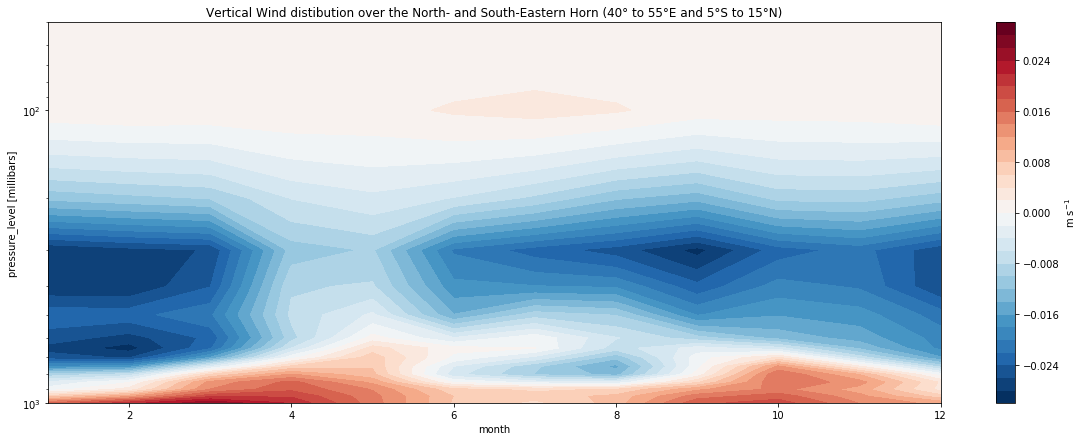

In [52]:
w_horn=ds.w.sel(longitude=slice(40, 52), latitude=slice(15, -5)).mean(dim= ['longitude', 'latitude'])
w_horn *= -1
plt.figure(figsize=(20,7))
w_horn.T.plot.contourf(levels=30, cbar_kwargs={'label':'m s$^{-1}$'})
plt.ylim([1000,50])
plt.xlim([1,12])
plt.yscale('log')
plt.title('Vertical Wind distibution over the North- and South-Eastern Horn (40° to 55°E and 5°S to 15°N)');

Another option: average over longitude and time and plot the vertical wind as a function of latitude!

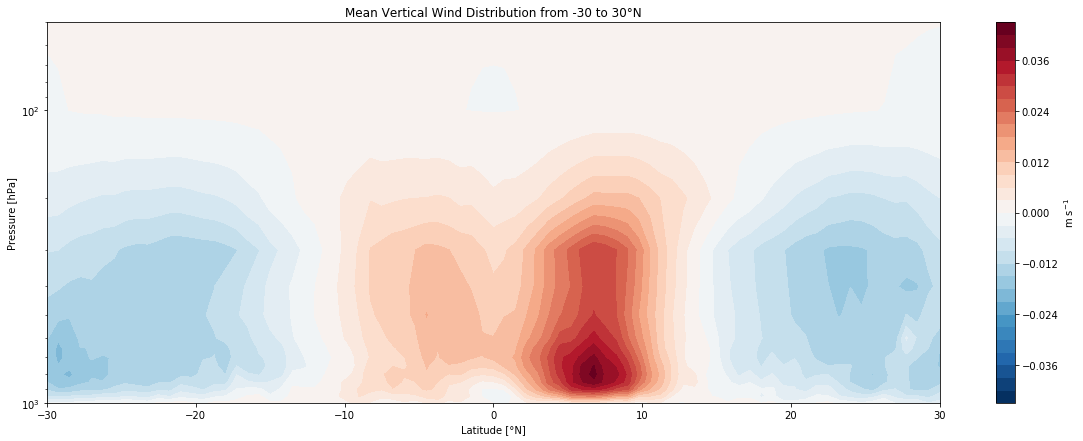

In [53]:
w_horn=ds.w.mean(dim= ['longitude', 'month']).sel(latitude = slice(30,-30))
w_horn *= -1
plt.figure(figsize=(20,7))
w_horn.plot.contourf(levels=30, cbar_kwargs={'label':'m s$^{-1}$'})
plt.ylim([1000,50])
plt.ylabel('Pressure [hPa]')
plt.xlabel('Latitude [°N]')
plt.yscale('log')
plt.title('Mean Vertical Wind Distribution from -30 to 30°N');

### 5.2.2 Zonal Average Plots

It's pretty easy, to produce a zonal plot of the vertical structure of the atmosphere:

In [54]:
u_allz = ds.u.sel(month = 1).load() #select average of january
u_allz = u_allz.mean(dim='longitude')
u_allz

<xarray.DataArray 'u' (level: 16, latitude: 241)>
array([[-1.085281e-03,  1.554329e+00,  3.092406e+00, ..., -4.730488e-01,
        -2.504447e-01, -1.085281e-03],
       [-1.085281e-03,  8.786772e-01,  1.759647e+00, ..., -1.454669e-01,
        -7.822993e-02, -1.085281e-03],
       [ 1.649857e-03,  5.555794e-01,  1.112756e+00, ...,  1.485904e-01,
         6.827749e-02,  1.649857e-03],
       ...,
       [-1.085281e-03, -1.148994e-01, -1.307558e-01, ..., -8.495842e-01,
        -1.394218e-01, -1.085281e-03],
       [-1.085281e-03, -9.085567e-02, -1.748037e-01, ..., -8.714742e-01,
        -9.002387e-02, -1.085281e-03],
       [-1.085281e-03, -6.249323e-02, -1.589189e-01, ..., -8.748928e-01,
        -8.323790e-02, -1.085281e-03]], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level     (level) int32 10 50 100 200 300 400 ... 750 800 850 900 950 1000
    month     int64 1

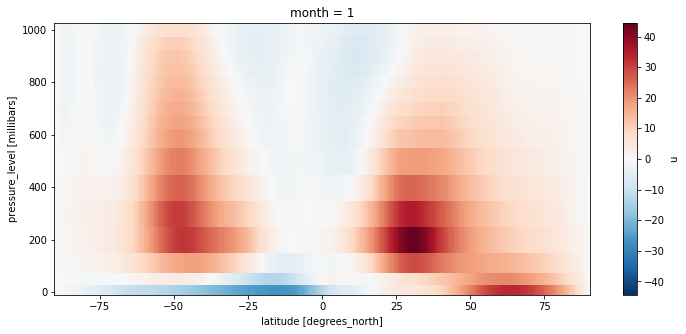

In [55]:
u_allz.plot();

We notice, that the y-axis needs to be reversed in order to go from the ground up to the higher atmosphere! Furthermore, the imshow plot does not really look nice. Let's make a contourf plot instead:

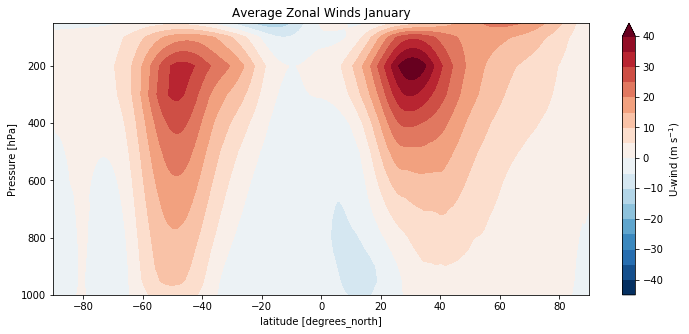

In [56]:
u_allz.plot.contourf(levels = np.arange(-45, 45, 5),  cbar_kwargs={'label':'U-wind (m s$^{-1}$)'});
plt.ylim([1000, 50]); #reverse the y-axis
plt.xlim([-90,90]);
plt.ylabel('Pressure [hPa]');
plt.title('Average Zonal Winds January');

To represent more acurately the real altitude of the winds, a logarithmic scale might be better:

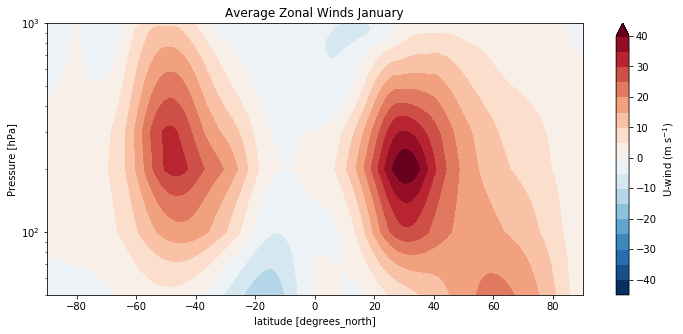

In [57]:
u_allz.plot.contourf(levels = np.arange(-45, 45, 5),  cbar_kwargs={'label':'U-wind (m s$^{-1}$)'});
plt.ylim([50,1000]);
plt.xlim([-90,90]);
plt.ylabel('Pressure [hPa]');
plt.title('Average Zonal Winds January')
plt.yscale('log') #change yscale from linear to logarithmic!

One can also take a certain area, average the zonal winds over that area and plot them as a function of the month!

We try this for the African Horn:

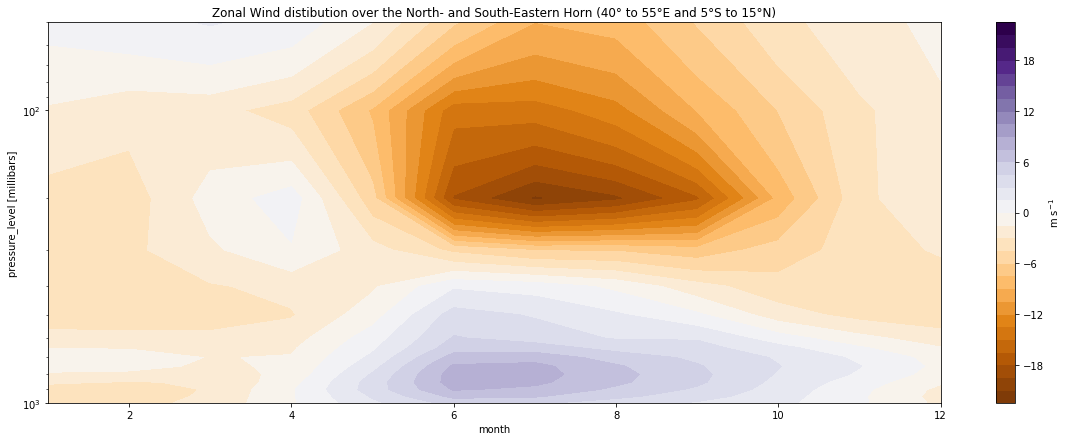

In [58]:
u_horn=ds.u.sel(longitude=slice(50,70), latitude=slice(12, -3)).mean(dim= ['longitude', 'latitude'])
plt.figure(figsize=(20,7))
u_horn.T.plot.contourf(levels=30, cbar_kwargs={'label':'m s$^{-1}$'}, cmap = 'PuOr')
plt.ylim([1000,50])
plt.yscale('log')
plt.title('Zonal Wind distibution over the North- and South-Eastern Horn (40° to 55°E and 5°S to 15°N)');